In [1]:
import numpy as np
import matplotlib.pyplot as plt

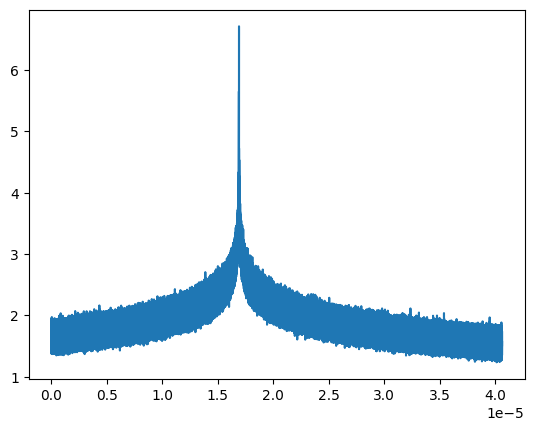

In [4]:
plt.plot(ts, Ft)

In [18]:
import wolensing.amplification_factor.amplification_factor as af
Tscale = 295529.46212367347
kwargs = {'Tscale':295529.46212367347}

amplification = af.amplification_factor(**kwargs)
amplification.importor(ts=ts, F_tilde=Ft, time=True)

In [10]:
fs, Ff = amplification.fourier(type2=True)

total time 44329419.31855102


In [63]:
from scipy.signal import savgol_filter
smoothened_Ft = savgol_filter(Ft, window_length=11, polyorder=4)

In [78]:
from wolensing.utils.utils import iwFourier
from scipy.fft import fftfreq
from scipy.fftpack import fft

def iwFourier1(ts, Ft, dt=1e-6):
    '''
    Fourier transform the time series data.

    :param ts: time series
    :param Ft: data
    :param type2: boolean, if True, use the appropriate time step for type 2 image.
    :return: sampling frequency and transformed data in frequency domain.
    '''

    num = len(ts)
    ws = 2 * np.pi * fftfreq(num, dt)[:num//2]
    Fw = np.conjugate(fft(Ft)[:num//2] * (1.j) * ws * dt)
    print('total time', num*dt)
    return ws, Fw

ws, Ff = iwFourier1(ts * Tscale, nFt, dt= 8e-7)

total time 12.0


In [73]:
from wolensing.utils.utils import coswindowback

nFt = coswindowback(Ft, 100)

In [76]:
def hamming_window(signal):
    # Length of the signal
    N = len(signal)
    
    # Create a Hamming window
    hamming_window = np.hamming(N)
    
    # Apply the Hamming window to the signal
    windowed_signal = signal * hamming_window
    
    return windowed_signal

nFt = hamming_window(Ft)

In [79]:
from bisect import bisect_left
fs = ws/(2*np.pi)
i = bisect_left(fs, 2000)

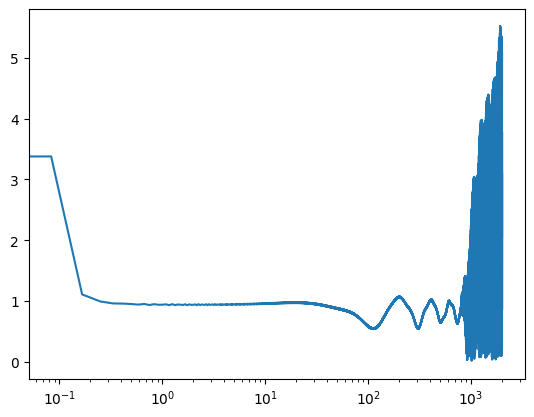

In [80]:
plt.semilogx(fs[:i], np.abs(Ff[:i]))

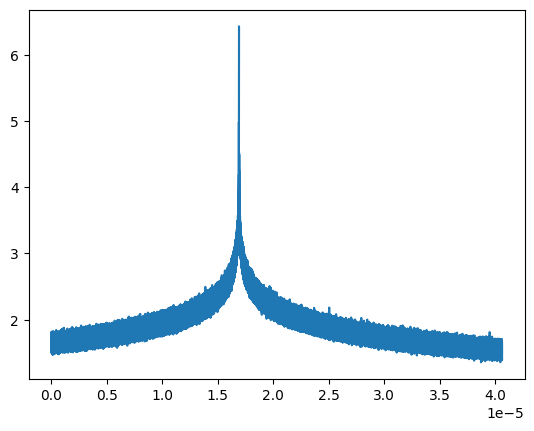

In [64]:
plt.plot(ts, smoothened_Ft)

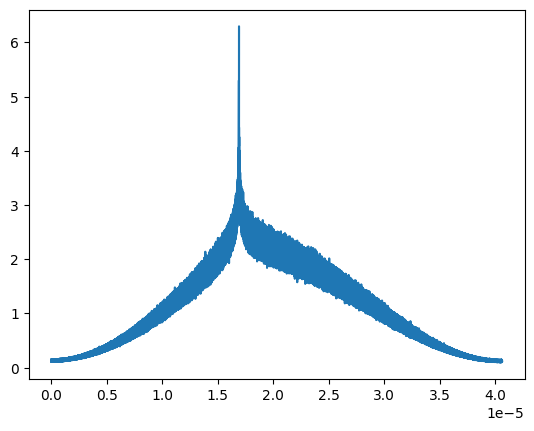

In [77]:
plt.plot(ts, nFt)